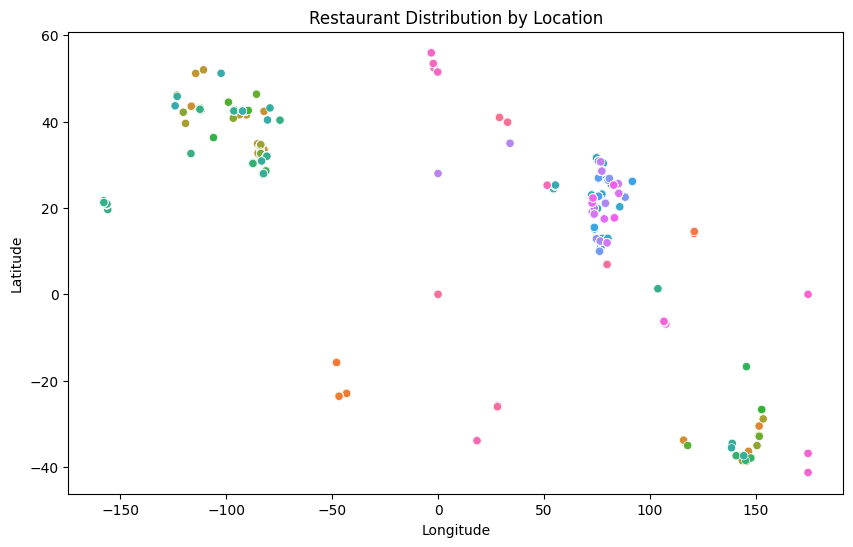

              Restaurant Count  Avg Rating  Avg Price Range
City                                                       
New Delhi                 5473    2.438845         1.621597
Gurgaon                   1118    2.651431         1.855993
Noida                     1080    2.036204         1.601852
Faridabad                  251    1.866932         1.454183
Ghaziabad                   25    2.852000         1.800000
Bhubaneshwar                21    3.980952         1.857143
Lucknow                     21    4.195238         2.571429
Amritsar                    21    3.685714         1.809524
Ahmedabad                   21    4.161905         2.571429
Guwahati                    21    4.190476         2.523810


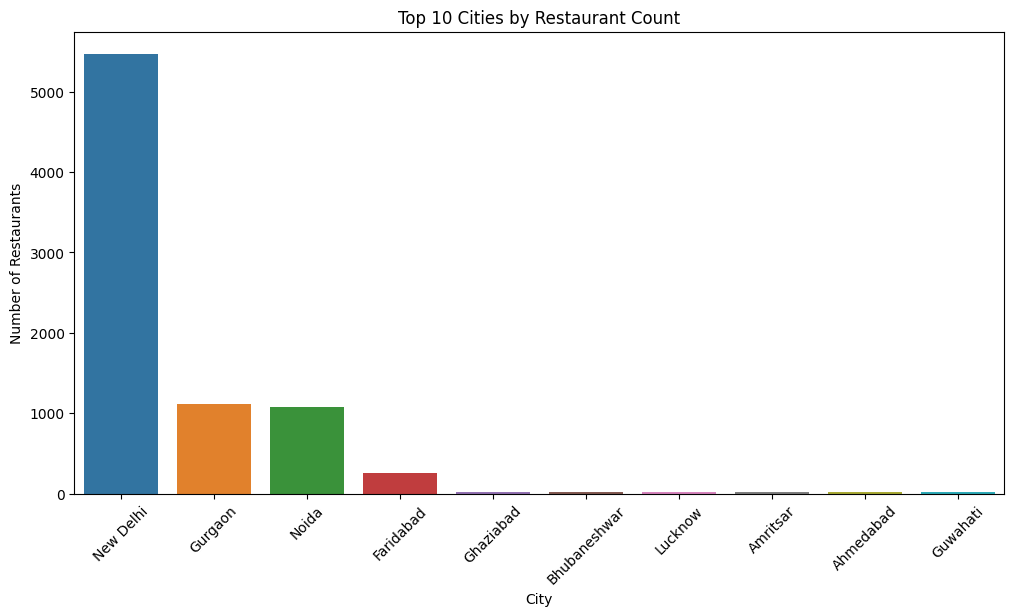

In [1]:
# Task 4: Location-Based Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df_geo = pd.read_csv("/kaggle/input/dataset-csv/Dataset .csv")
df_geo.dropna(subset=['Latitude', 'Longitude', 'City'], inplace=True)

# Plot restaurant distribution by coordinates
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='City', data=df_geo, legend=False)
plt.title("Restaurant Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Group by city and calculate average ratings
city_group = df_geo.groupby('City').agg({
    'Restaurant Name': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).rename(columns={
    'Restaurant Name': 'Restaurant Count',
    'Aggregate rating': 'Avg Rating',
    'Price range': 'Avg Price Range'
}).sort_values(by='Restaurant Count', ascending=False)

print(city_group.head(10))  # Top 10 cities

# Optional: plot restaurant count by city
plt.figure(figsize=(12,6))
sns.barplot(x=city_group.index[:10], y=city_group['Restaurant Count'][:10])
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()
